Baseline Model (No PCA):
Accuracy: 0.9815
Precision: 0.9827
Recall: 0.9815

Logistic Regression with 2 Principal Components:
Accuracy: 0.9630
Precision: 0.9662
Recall: 0.9630

Logistic Regression with 5 Principal Components:
Accuracy: 0.9815
Precision: 0.9824
Recall: 0.9815

Logistic Regression with 10 Principal Components:
Accuracy: 0.9815
Precision: 0.9827
Recall: 0.9815



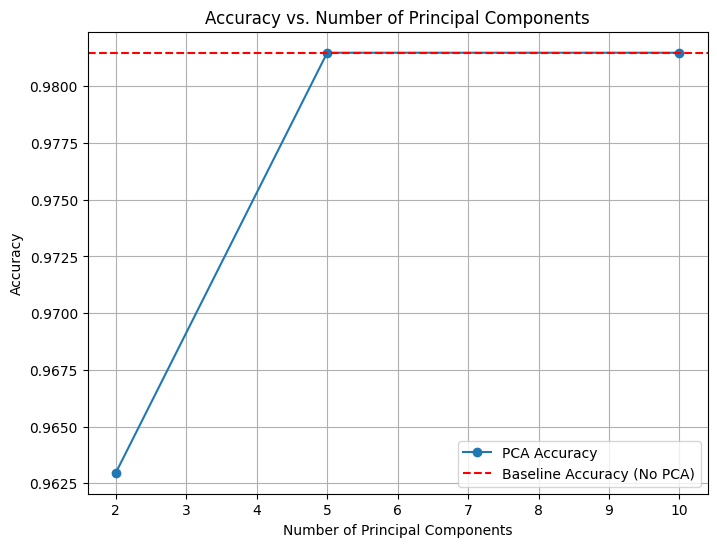

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.datasets import load_wine

# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Step 2: Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize the features (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 4: Baseline model (no PCA)
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train)
y_pred_baseline = log_reg.predict(X_test_scaled)

# Evaluate the baseline model
baseline_acc = accuracy_score(y_test, y_pred_baseline)
baseline_prec = precision_score(y_test, y_pred_baseline, average='weighted')
baseline_rec = recall_score(y_test, y_pred_baseline, average='weighted')

print("Baseline Model (No PCA):")
print(f"Accuracy: {baseline_acc:.4f}")
print(f"Precision: {baseline_prec:.4f}")
print(f"Recall: {baseline_rec:.4f}\n")


# Step 5: Apply PCA and train models with different numbers of components
components_list = [2, 5, 10]  # Number of components to keep
accuracy_scores = []

for n_components in components_list:
    # Apply PCA to the training data
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train a logistic regression model on the reduced dataset
    log_reg_pca = LogisticRegression(max_iter=10000)
    log_reg_pca.fit(X_train_pca, y_train)
    y_pred_pca = log_reg_pca.predict(X_test_pca)

    # Evaluate the model with PCA
    acc_pca = accuracy_score(y_test, y_pred_pca)
    accuracy_scores.append(acc_pca)

    print(f"Logistic Regression with {n_components} Principal Components:")
    print(f"Accuracy: {acc_pca:.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_pca, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_pca, average='weighted'):.4f}\n")

# Step 6: Plot how accuracy changes with different numbers of components
plt.figure(figsize=(8, 6))
plt.plot(components_list, accuracy_scores, marker='o', label='PCA Accuracy')
plt.axhline(baseline_acc, color='r', linestyle='--', label='Baseline Accuracy (No PCA)')
plt.title('Accuracy vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()